In [1]:
from PLBenchmarks import ligands, targets
import yaml
import pandas as pd
try:
    from importlib.resources import open_text
except ImportError:
    # Python 2.x backport
    from importlib_resources import open_text
from IPython.core.display import HTML

In [2]:
def getLigandSet(target, cols=None):
    td = targets.getTargetDir(target)
    file = open_text(f'PLBenchmarks.systems.{td}.00_data', 'ligands.yml')
    data = yaml.full_load_all(file)    
    dfs=[]
    for d in data:
        l = ligands.ligand(d)
        l.deriveObservables(derivedObs='dg')
        l.addMolToFrame()
        dfs.append(l.getDF(cols))
    if cols:
        df = pd.DataFrame(dfs)[cols]
    else:
        df = pd.DataFrame(dfs)
    file.close()
    return df

In [3]:
def getLigandSetHTML(target, cols=None):
    td = targets.getTargetDir(target)
    file = open_text(f'PLBenchmarks.systems.{td}.00_data', 'ligands.yml')
    data = yaml.full_load_all(file)    
    dfs=[]
    for d in data:
        l = ligands.ligand(d)
        l.deriveObservables(derivedObs='dg')
        l.findLinks()
        l.addMolToFrame()
        dfs.append(l.getDF(cols))
    file.close()
    
    if cols:
        df = pd.DataFrame(dfs)[cols]
    else:
        df = pd.DataFrame(dfs)
    
    html = df.to_html()
    html = html.replace('REP1', '<a target="_blank" href="')
    html = html.replace('REP2', '">')
    html = html.replace('REP3', '</a>')
    html = html.replace("\\n","<br>")
    return html

In [4]:
getLigandSet('jnk1')

name                                             smiles  \
                                                                     
0   lig_17124-1     CCOc1c(c(cc(n1)NC(=O)Cc2cc(c(cc2OC)Br)OC)N)C#N   
1   lig_18624-1               CCOc1c(c(cc(n1)NC(=O)Cc2ccccc2)N)C#N   
2   lig_18625-1             CCOc1c(c(cc(n1)NC(=O)Cc2ccccc2Cl)N)C#N   
3   lig_18626-1           CCOc1c(c(cc(n1)NC(=O)Cc2cccc(c2)Cl)N)C#N   
4   lig_18627-1           CCOc1c(c(cc(n1)NC(=O)Cc2ccc(cc2)Cl)N)C#N   
5   lig_18628-1              CCOc1c(c(cc(n1)NC(=O)Cc2ccccc2C)N)C#N   
6   lig_18629-1            CCOc1c(c(cc(n1)NC(=O)Cc2cccc(c2)C)N)C#N   
7   lig_18630-1            CCOc1c(c(cc(n1)NC(=O)Cc2ccc(cc2)C)N)C#N   
8   lig_18631-1             CCOc1c(c(cc(n1)NC(=O)Cc2ccccc2OC)N)C#N   
9   lig_18632-1           CCOc1c(c(cc(n1)NC(=O)Cc2cccc(c2)OC)N)C#N   
10  lig_18633-1           CCOc1c(c(cc(n1)NC(=O)Cc2ccc(cc2)OC)N)C#N   
11  lig_18634-1         CCOc1c(c(cc(n1)NC(=O)Cc2cc(ccc2OC)OC)N)C#N   
12  lig_18635-1           CCOc1c(c(cc(n1)NC(=O)Cc2cc(ccc2C)C)N)C#N   
13  lig_18636-1         CCOc1c(c(cc(n1)NC(=O)Cc2cc(ccc2Br)Br)N)C#N   
14  lig_18637-1  CCOc1c(c(cc(n1)NC(=O)Cc2cc(c(cc2OC)NC(=O)C)OC)...   
15  lig_18638-1  CCOc1c(c(cc(n1)NC(=O)Cc2cc(c(cc2OC)S(=O)(=O)C)...   
16  lig_18639-1  CCOc1c(c(cc(n1)NC(=O)Cc2cc(c(cc2OC)[N+](=O)[O-...   
17  lig_18652-1  CC(C)Oc1c(c(cc(n1)NC(=O)Cc2cc(c(cc2OC)S(=O)(=O...   
18  lig_18658-1      COc1ccc(c(c1)CC(=O)Nc2cc(c(c(n2)OCCO)C#N)N)OC   
19  lig_18659-1       COCCOc1c(c(cc(n1)NC(=O)Cc2cc(ccc2OC)OC)N)C#N   
20  lig_18660-1  COc1ccc(c(c1)CC(=O)Nc2cc(c(c(n2)OCCS(=O)(=O)C)...   

                                   docked measurement                     \
                                                 ic50                doi   
0   03_docked/lig_17124-1/lig_17124-1.sdf       77 nM  10.1021/jm060199b   
1   03_docked/lig_18624-1/lig_18624-1.sdf      570 nM  10.1021/jm060199b   
2   03_docked/lig_18625-1/lig_18625-1.sdf     1100 nM  10.1021/jm060199b   
3   03_docked/lig_18626-1/lig_18626-1.sdf      300 nM  10.1021/jm060199b   
4   03_docked/lig_18627-1/lig_18627-1.sdf      580 nM  10.1021/jm060199b   
5   03_docked/lig_18628-1/lig_18628-1.sdf      400 nM  10.1021/jm060199b   
6   03_docked/lig_18629-1/lig_18629-1.sdf      420 nM  10.1021/jm060199b   
7   03_docked/lig_18630-1/lig_18630-1.sdf      190 nM  10.1021/jm060199b   
8   03_docked/lig_18631-1/lig_18631-1.sdf      120 nM  10.1021/jm060199b   
9   03_docked/lig_18632-1/lig_18632-1.sdf      210 nM  10.1021/jm060199b   
10  03_docked/lig_18633-1/lig_18633-1.sdf      180 nM  10.1021/jm060199b   
11  03_docked/lig_18634-1/lig_18634-1.sdf       45 nM  10.1021/jm060199b   
12  03_docked/lig_18635-1/lig_18635-1.sdf     4400 nM  10.1021/jm060199b   
13  03_docked/lig_18636-1/lig_18636-1.sdf     3000 nM  10.1021/jm060199b   
14  03_docked/lig_18637-1/lig_18637-1.sdf       35 nM  10.1021/jm060199b   
15  03_docked/lig_18638-1/lig_18638-1.sdf       38 nM  10.1021/jm060199b   
16  03_docked/lig_18639-1/lig_18639-1.sdf       69 nM  10.1021/jm060199b   
17  03_docked/lig_18652-1/lig_18652-1.sdf       14 nM  10.1021/jm060199b   
18  03_docked/lig_18658-1/lig_18658-1.sdf       74 nM  10.1021/jm060199b   
19  03_docked/lig_18659-1/lig_18659-1.sdf      110 nM  10.1021/jm060199b   
20  03_docked/lig_18660-1/lig_18660-1.sdf      400 nM  10.1021/jm060199b   

                              DerivedMeasurement                   \
             comment   e_ic50                 dg             e_dg   
0    table 1 cmpd 6t    38 nM     -9.76 kcal/mol  -10.19 kcal/mol   
1    table 1 cmpd 6e   140 nM     -8.57 kcal/mol   -9.41 kcal/mol   
2    table 1 cmpd 6f   300 nM     -8.18 kcal/mol   -8.95 kcal/mol   
3    table 1 cmpd 6g    70 nM     -8.95 kcal/mol   -9.82 kcal/mol   
4    table 1 cmpd 6h   170 nM     -8.56 kcal/mol   -9.29 kcal/mol   
5    table 1 cmpd 6i   120 nM     -8.78 kcal/mol   -9.50 kcal/mol   
6    table 1 cmpd 6j    56 nM     -8.75 kcal/mol   -9.95 kcal/mol   
7    table 1 cmpd 6k     4 nM 


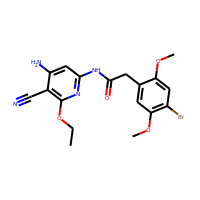
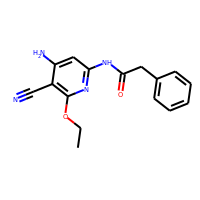
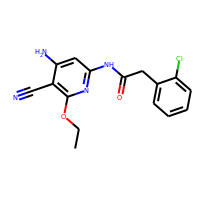
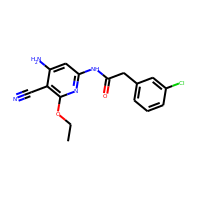
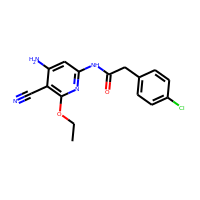
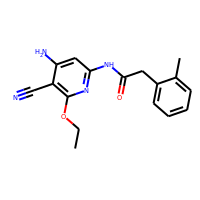
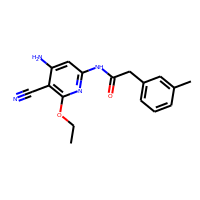
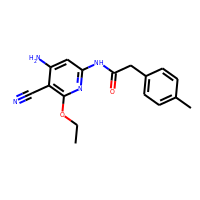
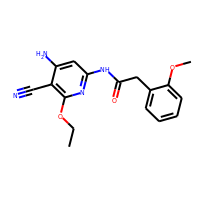
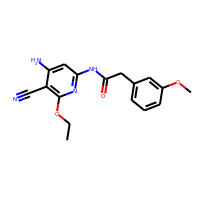
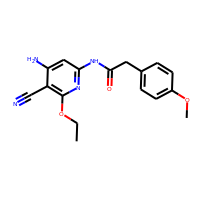
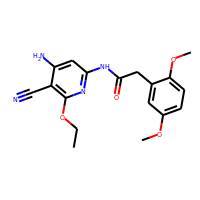
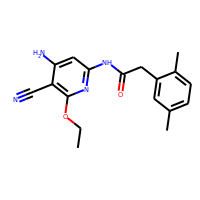
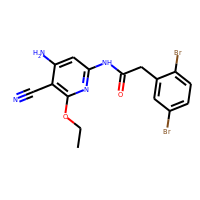
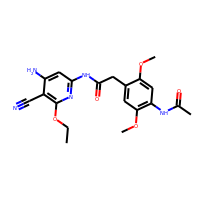
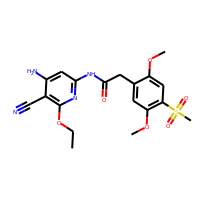
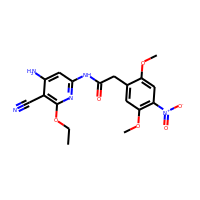
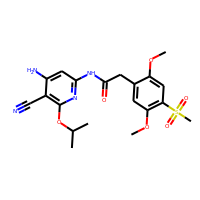
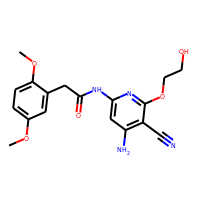
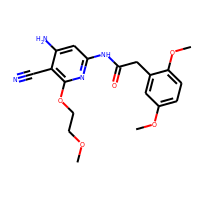
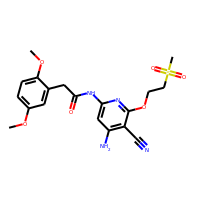

In [5]:
HTML(getLigandSetHTML('jnk1', ['name', 'ROMol', 'measurement', 'DerivedMeasurement']))


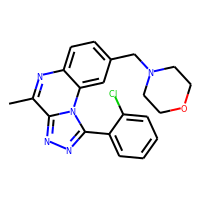
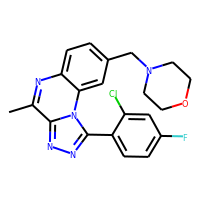
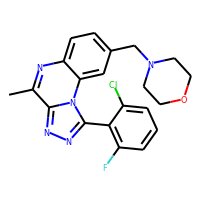
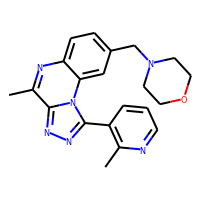
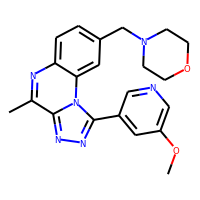
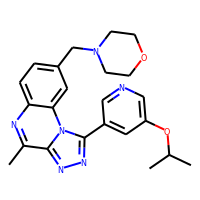
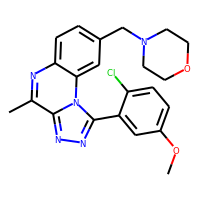
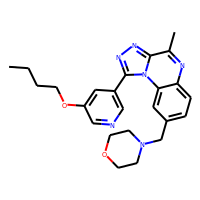
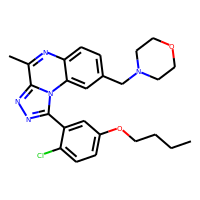
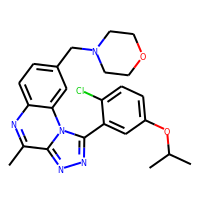
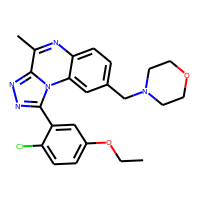
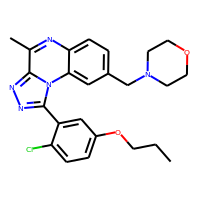
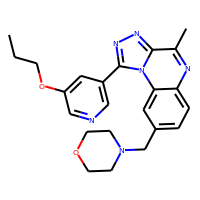
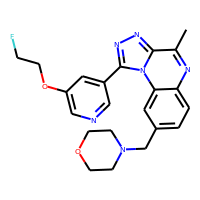
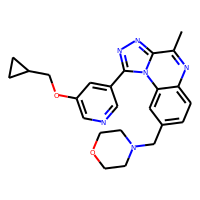
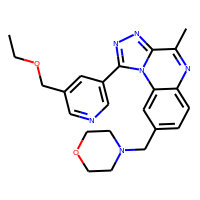
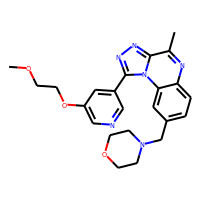
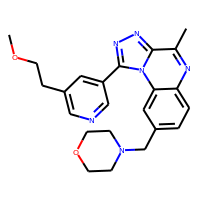
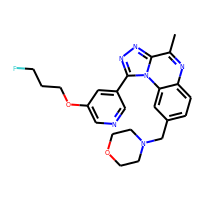
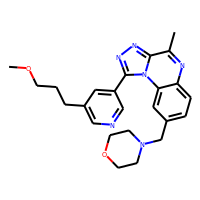
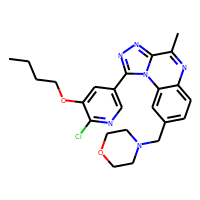

In [6]:
HTML(getLigandSetHTML('pde2', ['name', 'ROMol', 'measurement', 'DerivedMeasurement']))


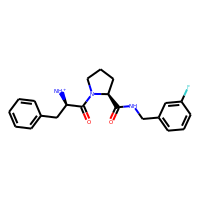
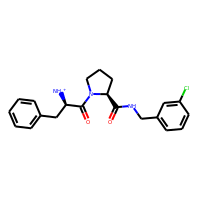
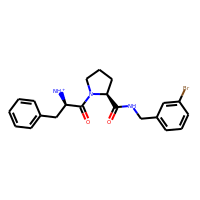
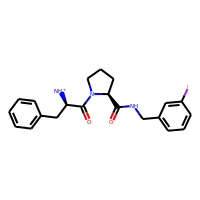
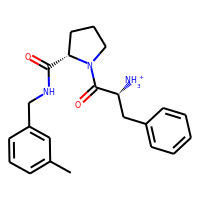
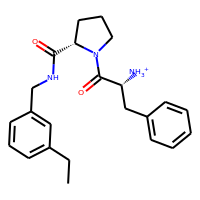
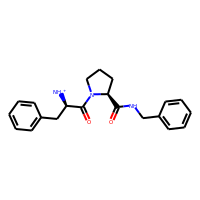
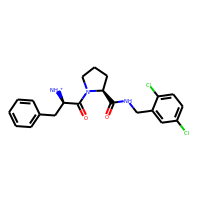
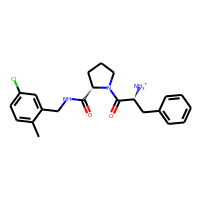
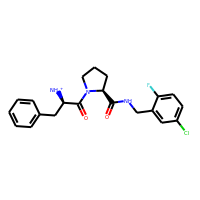
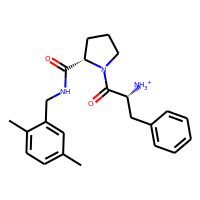

In [7]:
HTML(getLigandSetHTML('thrombin', ['name', 'ROMol', 'measurement', 'DerivedMeasurement']))